In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement

#### Predication of House Prices in Pune city According to area and other features

## 2. Data Gathering

In [2]:
df = pd.read_csv("Pune_House_Data.csv")
df

area_type   availability       size  society total_sqft  \
0      Super built-up  Area         19-Dec      2 BHK  Coomee        1056   
1                Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   
2            Built-up  Area  Ready To Move      3 BHK      NaN       1440   
3      Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   
4      Super built-up  Area  Ready To Move      2 BHK      NaN       1200   
...                     ...            ...        ...      ...        ...   
13315        Built-up  Area  Ready To Move  5 Bedroom  ArsiaEx       3453   
13316  Super built-up  Area  Ready To Move      4 BHK      NaN       3600   
13317        Built-up  Area  Ready To Move      2 BHK  Mahla T       1141   
13318  Super built-up  Area         18-Jun      4 BHK  SollyCl       4689   
13319  Super built-up  Area  Ready To Move      1 BHK      NaN        550   

       bath  balcony   price         site_location  
0       2.0      1.0   39.07           Alandi Road  
1       5.0      3.0  120.00       Ambegaon Budruk  
2       2.0      3.0   62.00            Anandnagar  
3       3.0      1.0   95.00                 Aundh  
4       2.0      1.0   51.00            Aundh Road  
...     ...      ...     ...                   ...  
13315   4.0      0.0  231.00                Pashan  
13316   5.0      NaN  400.00             Paud Road  
13317   2.0      1.0   60.00              Pirangut  
13318   4.0      1.0  488.00          Prabhat Road  
13319   1.0      1.0   17.00  Pune Railway Station  

[13320 rows x 9 columns]

In [3]:
df.head().T # Transpose of data

0                1               2  \
area_type      Super built-up  Area       Plot  Area  Built-up  Area   
availability                 19-Dec    Ready To Move   Ready To Move   
size                          2 BHK        4 Bedroom           3 BHK   
society                     Coomee           Theanmp             NaN   
total_sqft                     1056             2600            1440   
bath                            2.0              5.0             2.0   
balcony                         1.0              3.0             3.0   
price                         39.07            120.0            62.0   
site_location           Alandi Road  Ambegaon Budruk      Anandnagar   

                                  3                     4  
area_type      Super built-up  Area  Super built-up  Area  
availability          Ready To Move         Ready To Move  
size                          3 BHK                 2 BHK  
society                     Soiewre                   NaN  
total_sqft                     1521                  1200  
bath                            3.0                   2.0  
balcony                         1.0                   1.0  
price                          95.0                  51.0  
site_location                 Aundh            Aundh Road

##  3.EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### 1. area_type

In [6]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df["area_type"].isna().sum()

0

#### onehot encoding

In [9]:
df=pd.get_dummies(df,columns=['area_type'])
df

availability       size  society total_sqft  bath  balcony   price  \
0             19-Dec      2 BHK  Coomee        1056   2.0      1.0   39.07   
1      Ready To Move  4 Bedroom  Theanmp       2600   5.0      3.0  120.00   
2      Ready To Move      3 BHK      NaN       1440   2.0      3.0   62.00   
3      Ready To Move      3 BHK  Soiewre       1521   3.0      1.0   95.00   
4      Ready To Move      2 BHK      NaN       1200   2.0      1.0   51.00   
...              ...        ...      ...        ...   ...      ...     ...   
13315  Ready To Move  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00   
13316  Ready To Move      4 BHK      NaN       3600   5.0      NaN  400.00   
13317  Ready To Move      2 BHK  Mahla T       1141   2.0      1.0   60.00   
13318         18-Jun      4 BHK  SollyCl       4689   4.0      1.0  488.00   
13319  Ready To Move      1 BHK      NaN        550   1.0      1.0   17.00   

              site_location  area_type_Built-up  Area  area_type_Carpet  Area  \
0               Alandi Road                         0                       0   
1           Ambegaon Budruk                         0                       0   
2                Anandnagar                         1                       0   
3                     Aundh                         0                       0   
4                Aundh Road                         0                       0   
...                     ...                       ...                     ...   
13315                Pashan                         1                       0   
13316             Paud Road                         0                       0   
13317              Pirangut                         1                       0   
13318          Prabhat Road                         0                       0   
13319  Pune Railway Station                         0                       0   

       area_type_Plot  Area  area_type_Super built-up  Area  
0                         0                               1  
1                         1                               0  
2                         0                               0  
3                         0                               1  
4                         0                               1  
...                     ...                             ...  
13315                     0                               0  
13316                     0                               1  
13317                     0                               0  
13318                     0                               1  
13319                     0                               1  

[13320 rows x 12 columns]

### 2. availability

In [10]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [11]:
df["availability"].unique().tolist()
dict_availability = {i: 0 for i in df["availability"].unique().tolist()}
dict_availability["Ready To Move"] =1
dict_availability["Immediate Possession"] =1
dict_availability

{'19-Dec': 0,
 'Ready To Move': 1,
 '18-May': 0,
 '18-Feb': 0,
 '18-Nov': 0,
 '20-Dec': 0,
 '17-Oct': 0,
 '21-Dec': 0,
 '19-Sep': 0,
 '20-Sep': 0,
 '18-Mar': 0,
 '20-Feb': 0,
 '18-Apr': 0,
 '20-Aug': 0,
 '18-Oct': 0,
 '19-Mar': 0,
 '17-Sep': 0,
 '18-Dec': 0,
 '17-Aug': 0,
 '19-Apr': 0,
 '18-Jun': 0,
 '22-Dec': 0,
 '22-Jan': 0,
 '18-Aug': 0,
 '19-Jan': 0,
 '17-Jul': 0,
 '18-Jul': 0,
 '21-Jun': 0,
 '20-May': 0,
 '19-Aug': 0,
 '18-Sep': 0,
 '17-May': 0,
 '17-Jun': 0,
 '21-May': 0,
 '18-Jan': 0,
 '20-Mar': 0,
 '17-Dec': 0,
 '16-Mar': 0,
 '19-Jun': 0,
 '22-Jun': 0,
 '19-Jul': 0,
 '21-Feb': 0,
 'Immediate Possession': 1,
 '19-May': 0,
 '17-Nov': 0,
 '20-Oct': 0,
 '20-Jun': 0,
 '19-Feb': 0,
 '21-Oct': 0,
 '21-Jan': 0,
 '17-Mar': 0,
 '17-Apr': 0,
 '22-May': 0,
 '19-Oct': 0,
 '21-Jul': 0,
 '21-Nov': 0,
 '21-Mar': 0,
 '16-Dec': 0,
 '22-Mar': 0,
 '20-Jan': 0,
 '21-Sep': 0,
 '21-Aug': 0,
 '14-Nov': 0,
 '19-Nov': 0,
 '15-Nov': 0,
 '16-Jul': 0,
 '15-Jun': 0,
 '17-Feb': 0,
 '20-Nov': 0,
 '20-Jul': 0,

In [12]:
df["availability"].replace(dict_availability,inplace=True)
df["availability"]

0        0
1        1
2        1
3        1
4        1
        ..
13315    1
13316    1
13317    1
13318    0
13319    1
Name: availability, Length: 13320, dtype: int64

In [13]:
df["availability"].value_counts()

1    10597
0     2723
Name: availability, dtype: int64

In [14]:
df["availability"].isna().sum()

0

### 3. size

In [15]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [17]:
df['size'].fillna(df["size"].mode()[0],inplace=True) # as there was missing value we filled it with mode
df["size"]

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [18]:
df["size"].isna().sum()

0

In [19]:
dict_size = {'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18}
df["size"]

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [20]:
df["size"].isna().sum()

0

In [21]:
df["size"].replace(dict_size,inplace=True)
df

availability  size  society total_sqft  bath  balcony   price  \
0                 0     2  Coomee        1056   2.0      1.0   39.07   
1                 1     4  Theanmp       2600   5.0      3.0  120.00   
2                 1     3      NaN       1440   2.0      3.0   62.00   
3                 1     3  Soiewre       1521   3.0      1.0   95.00   
4                 1     2      NaN       1200   2.0      1.0   51.00   
...             ...   ...      ...        ...   ...      ...     ...   
13315             1     5  ArsiaEx       3453   4.0      0.0  231.00   
13316             1     4      NaN       3600   5.0      NaN  400.00   
13317             1     2  Mahla T       1141   2.0      1.0   60.00   
13318             0     4  SollyCl       4689   4.0      1.0  488.00   
13319             1     1      NaN        550   1.0      1.0   17.00   

              site_location  area_type_Built-up  Area  area_type_Carpet  Area  \
0               Alandi Road                         0                       0   
1           Ambegaon Budruk                         0                       0   
2                Anandnagar                         1                       0   
3                     Aundh                         0                       0   
4                Aundh Road                         0                       0   
...                     ...                       ...                     ...   
13315                Pashan                         1                       0   
13316             Paud Road                         0                       0   
13317              Pirangut                         1                       0   
13318          Prabhat Road                         0                       0   
13319  Pune Railway Station                         0                       0   

       area_type_Plot  Area  area_type_Super built-up  Area  
0                         0                               1  
1                         1                               0  
2                         0                               0  
3                         0                               1  
4                         0                               1  
...                     ...                             ...  
13315                     0                               0  
13316                     0                               1  
13317                     0                               0  
13318                     0                               1  
13319                     0                               1  

[13320 rows x 12 columns]

### 4.society

In [22]:
df["society"].unique()


array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [23]:
df["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [24]:
df["society"].isna().sum()

5502

In [25]:
df.drop("society",axis=1,inplace=True)

In [26]:
df

availability  size total_sqft  bath  balcony   price  \
0                 0     2       1056   2.0      1.0   39.07   
1                 1     4       2600   5.0      3.0  120.00   
2                 1     3       1440   2.0      3.0   62.00   
3                 1     3       1521   3.0      1.0   95.00   
4                 1     2       1200   2.0      1.0   51.00   
...             ...   ...        ...   ...      ...     ...   
13315             1     5       3453   4.0      0.0  231.00   
13316             1     4       3600   5.0      NaN  400.00   
13317             1     2       1141   2.0      1.0   60.00   
13318             0     4       4689   4.0      1.0  488.00   
13319             1     1        550   1.0      1.0   17.00   

              site_location  area_type_Built-up  Area  area_type_Carpet  Area  \
0               Alandi Road                         0                       0   
1           Ambegaon Budruk                         0                       0   
2                Anandnagar                         1                       0   
3                     Aundh                         0                       0   
4                Aundh Road                         0                       0   
...                     ...                       ...                     ...   
13315                Pashan                         1                       0   
13316             Paud Road                         0                       0   
13317              Pirangut                         1                       0   
13318          Prabhat Road                         0                       0   
13319  Pune Railway Station                         0                       0   

       area_type_Plot  Area  area_type_Super built-up  Area  
0                         0                               1  
1                         1                               0  
2                         0                               0  
3                         0                               1  
4                         0                               1  
...                     ...                             ...  
13315                     0                               0  
13316                     0                               1  
13317                     0                               0  
13318                     0                               1  
13319                     0                               1  

[13320 rows x 11 columns]

### 5.total_sqft

In [27]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [29]:
df["total_sqft"].isna().sum() # No missing value

0

In [30]:
df["total_sqft"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


#### This  feature consists of  range values by applying below function we will replace range with there average value and other unit values with nan and then replace it with median considering of outliers

In [31]:
def convert(x):
    pp = x.split('-')
#     print("pp--->",tokel)
    if len(pp) == 2:
        return(float(pp[0])+float(pp[1]))/2
    try:
        return float(x)
    except:
        return None
df['new_total_sqft']=df['total_sqft'].apply(convert)
df['new_total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: new_total_sqft, Length: 13320, dtype: float64

In [32]:
df.drop('total_sqft',axis=1,inplace=True)
df['new_total_sqft'].fillna(df['new_total_sqft'].median(),inplace=True)

In [33]:
df["new_total_sqft"].isna().sum()

0

### 6. bath

In [34]:
df["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [35]:
df["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [36]:
df["bath"].isna().sum()

73

<AxesSubplot: >

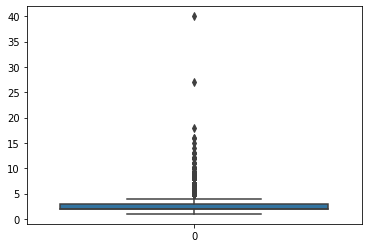

In [37]:
import seaborn as sns
sns.boxplot(df['bath'])

#### This feature consists of outliers so replacing nan value with median

In [38]:
df['bath'].fillna(df['bath'].median(),inplace=True)
df

availability  size  bath  balcony   price         site_location  \
0                 0     2   2.0      1.0   39.07           Alandi Road   
1                 1     4   5.0      3.0  120.00       Ambegaon Budruk   
2                 1     3   2.0      3.0   62.00            Anandnagar   
3                 1     3   3.0      1.0   95.00                 Aundh   
4                 1     2   2.0      1.0   51.00            Aundh Road   
...             ...   ...   ...      ...     ...                   ...   
13315             1     5   4.0      0.0  231.00                Pashan   
13316             1     4   5.0      NaN  400.00             Paud Road   
13317             1     2   2.0      1.0   60.00              Pirangut   
13318             0     4   4.0      1.0  488.00          Prabhat Road   
13319             1     1   1.0      1.0   17.00  Pune Railway Station   

       area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
0                             0                       0                     0   
1                             0                       0                     1   
2                             1                       0                     0   
3                             0                       0                     0   
4                             0                       0                     0   
...                         ...                     ...                   ...   
13315                         1                       0                     0   
13316                         0                       0                     0   
13317                         1                       0                     0   
13318                         0                       0                     0   
13319                         0                       0                     0   

       area_type_Super built-up  Area  new_total_sqft  
0                                   1          1056.0  
1                                   0          2600.0  
2                                   0          1440.0  
3                                   1          1521.0  
4                                   1          1200.0  
...                               ...             ...  
13315                               0          3453.0  
13316                               1          3600.0  
13317                               0          1141.0  
13318                               1          4689.0  
13319                               1           550.0  

[13320 rows x 11 columns]

In [39]:
df["bath"].isna().sum()

0

In [40]:
df["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [41]:
df["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [42]:
df["balcony"].isna().sum()

609

<AxesSubplot: >

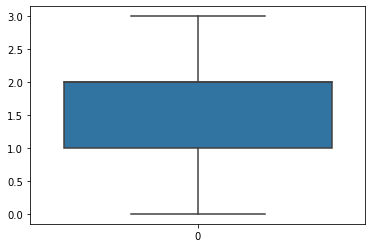

In [43]:
sns.boxplot(df['balcony'])

#### There is no outlier,replace nan value with mean.

In [44]:
df['balcony'].fillna(df['balcony'].mean(),inplace=True)

In [45]:
df["balcony"].isna().sum()

0

In [46]:
df["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [47]:
df["site_location"].nunique()

97

In [48]:
df["site_location"].value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

#### As site location matters it is one of the important feature, encoded with the help of label encoding considering priority areawise

In [49]:
dict_site_location = {'Alandi Road': 1,
 'Kalyani Nagar': 2,
 'Mahatma Gandhi Road': 3,
 'Lulla Nagar': 4,
 'Laxmi Road': 5,
 'Law College Road': 6,
 'Ambegaon Budruk': 7,
 'Koregaon Park': 8,
 'Kondhwa Khurd': 9,
 'Kondhwa Budruk': 10,
 'Kondhwa': 11,
 'Kharadi': 12,
 'Khadki': 13,
 'Khadaki': 14,
 'Katraj': 15,
 'Kasba Peth': 16,
 'Karve Road': 17,
 'Mangalwar peth': 18,
 'Manik Bagh': 19,
 'Market yard': 20,
 'Padmavati': 21,
 'Pune Railway Station': 22,
 'Prabhat Road': 23,
 'Pirangut': 24,
 'Paud Road': 25,
 'Pashan': 26,
 'Parvati Darshan': 27,
 'Navi Peth': 28,
 'Model colony': 29,
 'Narayangaon': 30,
 'Narayan Peth': 31,
 'Nana Peth': 32,
 'Nagar Road': 33,
 'Mundhawa': 34,
 'Mukund Nagar': 35,
 'Karve Nagar': 36,
 'Kothrud': 37,
 'Jangali Maharaj Road': 38,
 'Bhavani Peth': 40,
 'Chandan Nagar': 39,
 'Camp': 41,
 'Bund Garden Road': 42,
 'Budhwar Peth': 43,
 'Bopodi': 44,
 'Bibvewadi': 45,
 'Bhandarkar Road': 46,
 'Deccan Gymkhana': 47,
 'Baner road': 48,
 'Baner': 49,
 'Hingne Khurd': 50,
 'Aundh Road': 51,
 'Aundh': 52,
 'Anandnagar': 53,
 'Dapodi': 54,
 'Balaji Nagar': 55,
 'Dehu Road': 56,
 'Ganeshkhind': 57,
 'Dhankawadi': 58,
 'Hadapsar Industrial Estate': 59,
 'Guruwar peth': 60,
 'Gultekdi': 61,
 'Gokhale Nagar': 62,
 'Ghorpade Peth': 63,
 'Hadapsar': 64,
 'Ganesh Peth': 65,
 'Dhayari Phata': 66,
 'Fergusson College Road': 67,
 'Fatima Nagar': 68,
 'Erandwane': 69,
 'Dhole Patil Road': 70,
 'Tilak Road': 71,
 'Uruli Devachi': 72,
 'Vadgaon Budruk': 73,
 'Wadgaon Sheri': 74,
 'Viman Nagar': 75,
 'Wakadewadi': 76,
 'Vishrant Wadi': 77,
 'Wagholi': 78,
 'Yerawada': 79,
 'Wanowrie': 80,
 'Warje': 81,
 'Somwar Peth': 82,
 'Swargate': 83,
 'Sasson Road': 84,
 'Sinhagad Road': 85,
 'Shukrawar Peth': 86,
 'Shivaji Nagar': 87,
 'Shaniwar Peth': 88,
 'Senapati Bapat Road': 89,
 'Satara Road': 90,
 'Salunke Vihar': 91,
 'Sahakar Nagar': 92,
 'Sadashiv Peth': 93,
 'Raviwar Peth': 94,
 'Rasta Peth': 95,
 'Ghorpadi': 96,
 'other': 97}
df['site_location'].replace(dict_site_location, inplace=True)

In [50]:
df['site_location'].fillna(1,inplace=True) # null value filled with mode

In [51]:
df['site_location']

0         1.0
1         7.0
2        53.0
3        52.0
4        51.0
         ... 
13315    26.0
13316    25.0
13317    24.0
13318    23.0
13319    22.0
Name: site_location, Length: 13320, dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int64  
 1   size                            13320 non-null  int64  
 2   bath                            13320 non-null  float64
 3   balcony                         13320 non-null  float64
 4   price                           13320 non-null  float64
 5   site_location                   13320 non-null  float64
 6   area_type_Built-up  Area        13320 non-null  uint8  
 7   area_type_Carpet  Area          13320 non-null  uint8  
 8   area_type_Plot  Area            13320 non-null  uint8  
 9   area_type_Super built-up  Area  13320 non-null  uint8  
 10  new_total_sqft                  13320 non-null  float64
dtypes: float64(5), int64(2), uint8(4)
memory usage: 780.6 KB


### 1. Checking of Linearity

In [54]:
df.corr()

availability      size      bath   balcony  \
availability                        1.000000  0.098651  0.074625  0.112083   
size                                0.098651  1.000000  0.895786  0.170318   
bath                                0.074625  0.895786  1.000000  0.182671   
balcony                             0.112083  0.170318  0.182671  1.000000   
price                               0.034285  0.398074  0.454449  0.103989   
site_location                       0.000865 -0.004305 -0.008930 -0.002052   
area_type_Built-up  Area            0.106883 -0.004080 -0.014629 -0.062922   
area_type_Carpet  Area             -0.012051 -0.008526 -0.011088 -0.017417   
area_type_Plot  Area                0.101088  0.405992  0.376291 -0.092325   
area_type_Super built-up  Area     -0.161531 -0.302932 -0.271403  0.124131   
new_total_sqft                      0.021638  0.345857  0.387513  0.136250   

                                   price  site_location  \
availability                    0.034285       0.000865   
size                            0.398074      -0.004305   
bath                            0.454449      -0.008930   
balcony                         0.103989      -0.002052   
price                           1.000000      -0.012968   
site_location                  -0.012968       1.000000   
area_type_Built-up  Area       -0.026177       0.004557   
area_type_Carpet  Area         -0.012553      -0.020377   
area_type_Plot  Area            0.272669      -0.012761   
area_type_Super built-up  Area -0.183222       0.009428   
new_total_sqft                  0.574721       0.002460   

                                area_type_Built-up  Area  \
availability                                    0.106883   
size                                           -0.004080   
bath                                           -0.014629   
balcony                                        -0.062922   
price                                          -0.026177   
site_location                                   0.004557   
area_type_Built-up  Area                        1.000000   
area_type_Carpet  Area                         -0.038186   
area_type_Plot  Area                           -0.199409   
area_type_Super built-up  Area                 -0.656025   
new_total_sqft                                  0.022008   

                                area_type_Carpet  Area  area_type_Plot  Area  \
availability                                 -0.012051              0.101088   
size                                         -0.008526              0.405992   
bath                                         -0.011088              0.376291   
balcony                                      -0.017417             -0.092325   
price                                        -0.012553              0.272669   
site_location                                -0.020377             -0.012761   
area_type_Built-up  Area                     -0.038186             -0.199409   
area_type_Carpet  Area                        1.000000             -0.034332   
area_type_Plot  Area                         -0.034332              1.000000   
area_type_Super built-up  Area               -0.112947             -0.589814   
new_total_sqft                               -0.016652              0.095034   

                                area_type_Super built-up  Area  new_total_sqft  
availability                                         -0.161531        0.021638  
size                                                 -0.302932        0.345857  
bath                                                 -0.271403        0.387513  
balcony                                               0.124131        0.136250  
price                                                -0.183222        0.574721  
site_location                                         0.009428        0.002460  
area_type_Built-up  Area                             -0.656025        0.022008  
area_type_Carpet  Area                               -0.

<AxesSubplot: >

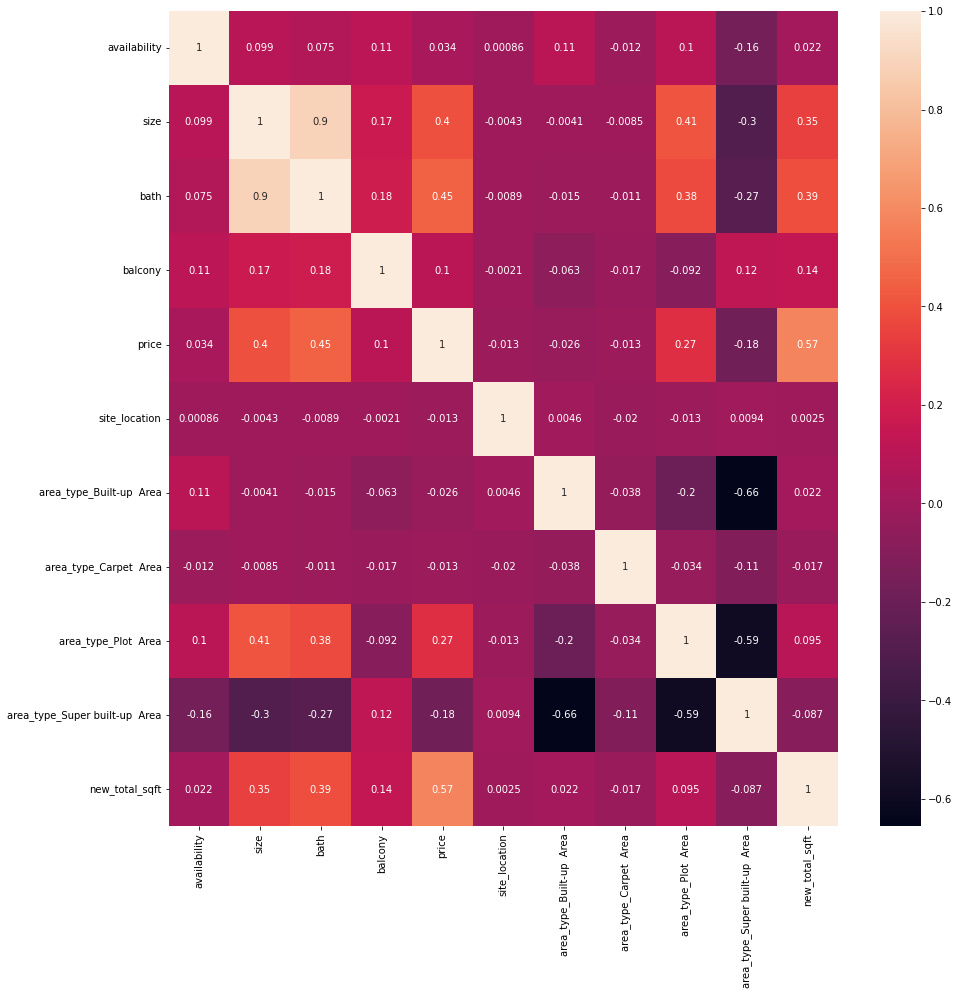

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

### 2. Checking of Multicollinearity

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Dropping target column as collinearity is checked for independant variables only

In [57]:
x=df.drop("price",axis=1)
x

availability  size  bath   balcony  site_location  \
0                 0     2   2.0  1.000000            1.0   
1                 1     4   5.0  3.000000            7.0   
2                 1     3   2.0  3.000000           53.0   
3                 1     3   3.0  1.000000           52.0   
4                 1     2   2.0  1.000000           51.0   
...             ...   ...   ...       ...            ...   
13315             1     5   4.0  0.000000           26.0   
13316             1     4   5.0  1.584376           25.0   
13317             1     2   2.0  1.000000           24.0   
13318             0     4   4.0  1.000000           23.0   
13319             1     1   1.0  1.000000           22.0   

       area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
0                             0                       0                     0   
1                             0                       0                     1   
2                             1                       0                     0   
3                             0                       0                     0   
4                             0                       0                     0   
...                         ...                     ...                   ...   
13315                         1                       0                     0   
13316                         0                       0                     0   
13317                         1                       0                     0   
13318                         0                       0                     0   
13319                         0                       0                     0   

       area_type_Super built-up  Area  new_total_sqft  
0                                   1          1056.0  
1                                   0          2600.0  
2                                   0          1440.0  
3                                   1          1521.0  
4                                   1          1200.0  
...                               ...             ...  
13315                               0          3453.0  
13316                               1          3600.0  
13317                               0          1141.0  
13318                               1          4689.0  
13319                               1           550.0  

[13320 rows x 10 columns]

In [58]:
y=df["price"]
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

<AxesSubplot: >

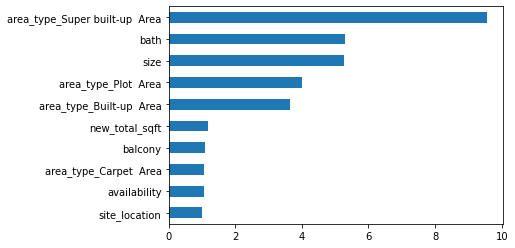

In [59]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind = 'barh') # sort function to get graph properly in order (bar for vertical

### 4. Model Training

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train

availability  size  bath  balcony  site_location  \
3844              0     2   2.0      2.0           52.0   
4738              1     6   6.0      3.0           59.0   
9497              1     4   3.0      1.0           74.0   
1308              0     2   2.0      1.0           32.0   
12098             1     2   2.0      3.0            7.0   
...             ...   ...   ...      ...            ...   
10955             1     1   1.0      1.0           45.0   
905               0     1   1.0      1.0           14.0   
5192              1     2   2.0      1.0           48.0   
12172             1     1   1.0      1.0           91.0   
235               1     3   2.0      1.0           12.0   

       area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
3844                          0                       0                     0   
4738                          0                       0                     1   
9497                          1                       0                     0   
1308                          0                       0                     0   
12098                         0                       0                     0   
...                         ...                     ...                   ...   
10955                         1                       0                     0   
905                           0                       0                     0   
5192                          0                       0                     0   
12172                         0                       0                     0   
235                           0                       0                     0   

       area_type_Super built-up  Area  new_total_sqft  
3844                                1          1299.0  
4738                                0          1850.0  
9497                                0          1900.0  
1308                                1          1100.0  
12098                               1          1315.0  
...                               ...             ...  
10955                               0           600.0  
905                                 1           525.0  
5192                                1          1246.0  
12172                               1           720.0  
235                                 1          1500.0  

[10656 rows x 10 columns]

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10656, 10)
(2664, 10)
(10656,)
(2664,)


In [64]:
model=LinearRegression()

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred_test = model.predict(x_test)
y_pred_test
print(len(y_pred_test))

2664


In [67]:
y_pred_train = model.predict(x_train)
print(y_pred_train)
print(len(y_pred_train))

[ 78.03064189 254.35037349 118.64738937 ...  67.48861209  14.90879201
  73.68772394]
10656


In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 3. Normality of Residual

In [69]:
# Residual on train for Normality
residual_train = y_train - y_pred_train # yactual - ypredicated
residual_train

3844       6.969358
4738    -104.350373
9497     -28.647389
1308     -15.272918
12098    -26.705139
            ...    
10955    112.214457
905       17.220406
5192      -4.488612
12172     18.091208
235       -8.687724
Name: price, Length: 10656, dtype: float64

In [70]:
# Residual on test for Normality
residual_test = y_test - y_pred_test # yactual - ypredicated
residual_test

5854      -9.597656
7124     -22.345252
8528      21.704096
11109     44.633966
8180      -0.119331
            ...    
9042       4.748279
3660     -13.319298
7364      -1.490081
639      104.781790
5815     -23.599317
Name: price, Length: 2664, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Density'>

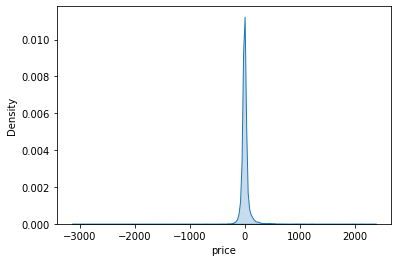

In [71]:
sns.kdeplot(residual_train,fill=True)

<AxesSubplot: xlabel='price', ylabel='Density'>

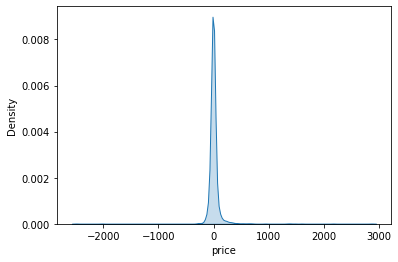

In [72]:
sns.kdeplot(residual_test,fill=True)

### 4. Homoscedascity

<AxesSubplot: ylabel='price'>

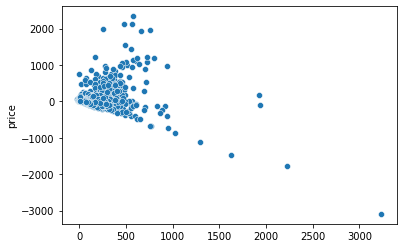

In [73]:
sns.scatterplot(x= y_pred_train, y= residual_train)

<AxesSubplot: ylabel='price'>

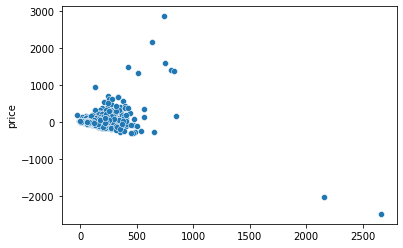

In [74]:
sns.scatterplot(x= y_pred_test, y= residual_test)

### 5. Model Evaluation

In [75]:
# Training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 11805.247135906611
RMSE : 108.65195412833867
MAE : 42.89499633315009
R Squared : 0.4353930767075861


In [76]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred_test)
print("R Squared :",r2)

MSE : 17899.72309579481
RMSE : 133.78984675899292
MAE : 44.48130117393939
R Squared : 0.34473173925059797


In [77]:
project_dict = {'availability_dict': dict_availability,'dict_size':dict_size,'dict_site_location':dict_site_location,
               'column_dict':x.columns.tolist()}
project_dict


{'availability_dict': {'19-Dec': 0,
  'Ready To Move': 1,
  '18-May': 0,
  '18-Feb': 0,
  '18-Nov': 0,
  '20-Dec': 0,
  '17-Oct': 0,
  '21-Dec': 0,
  '19-Sep': 0,
  '20-Sep': 0,
  '18-Mar': 0,
  '20-Feb': 0,
  '18-Apr': 0,
  '20-Aug': 0,
  '18-Oct': 0,
  '19-Mar': 0,
  '17-Sep': 0,
  '18-Dec': 0,
  '17-Aug': 0,
  '19-Apr': 0,
  '18-Jun': 0,
  '22-Dec': 0,
  '22-Jan': 0,
  '18-Aug': 0,
  '19-Jan': 0,
  '17-Jul': 0,
  '18-Jul': 0,
  '21-Jun': 0,
  '20-May': 0,
  '19-Aug': 0,
  '18-Sep': 0,
  '17-May': 0,
  '17-Jun': 0,
  '21-May': 0,
  '18-Jan': 0,
  '20-Mar': 0,
  '17-Dec': 0,
  '16-Mar': 0,
  '19-Jun': 0,
  '22-Jun': 0,
  '19-Jul': 0,
  '21-Feb': 0,
  'Immediate Possession': 1,
  '19-May': 0,
  '17-Nov': 0,
  '20-Oct': 0,
  '20-Jun': 0,
  '19-Feb': 0,
  '21-Oct': 0,
  '21-Jan': 0,
  '17-Mar': 0,
  '17-Apr': 0,
  '22-May': 0,
  '19-Oct': 0,
  '21-Jul': 0,
  '21-Nov': 0,
  '21-Mar': 0,
  '16-Dec': 0,
  '22-Mar': 0,
  '20-Jan': 0,
  '21-Sep': 0,
  '21-Aug': 0,
  '14-Nov': 0,
  '19-Nov': 0

### Creating JSON File

In [78]:
import json

with open("project.json", "w") as f:
    json.dump(project_dict, f)

### Creating Pickle File

In [79]:
import pickle
 
with open("Pune_House_Predication.pkl","wb") as f:
    pickle.dump(model,f)
    